In [ ]:
import numpy as np
import pandas as pd



import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.utils import resample
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC

In [ ]:
df = pd.read_csv('/content/Bank Customer Churn Prediction.csv')
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42.0,2,0.00,1,1.0,1.0,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41.0,1,83807.86,1,0.0,1.0,112542.58,0
2,3,15619304,Onio,502,France,Female,42.0,8,159660.80,3,1.0,0.0,113931.57,1
3,4,15701354,Boni,699,France,Female,39.0,1,0.00,2,0.0,0.0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43.0,2,125510.82,1,NaN,1.0,79084.10,0


In [ ]:
df.shape

(10002, 14)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10002 entries, 0 to 10001
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10002 non-null  int64  
 1   CustomerId       10002 non-null  int64  
 2   Surname          10002 non-null  object 
 3   CreditScore      10002 non-null  int64  
 4   Geography        10001 non-null  object 
 5   Gender           10002 non-null  object 
 6   Age              10001 non-null  float64
 7   Tenure           10002 non-null  int64  
 8   Balance          10002 non-null  float64
 9   NumOfProducts    10002 non-null  int64  
 10  HasCrCard        10001 non-null  float64
 11  IsActiveMember   10001 non-null  float64
 12  EstimatedSalary  10002 non-null  float64
 13  Exited           10002 non-null  int64  
dtypes: float64(5), int64(6), object(3)
memory usage: 1.1+ MB


In [ ]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10002.000000,1.000200e+04,10002.000000,10001.000000,10002.000000,10002.000000,10002.000000,10001.000000,10001.000000,10002.000000,10002.000000
mean,5001.499600,1.569093e+07,650.555089,38.922311,5.012498,76491.112875,1.530194,0.705529,0.514949,100083.331145,0.203759
std,2887.472338,7.193177e+04,96.661615,10.487200,2.891973,62393.474144,0.581639,0.455827,0.499801,57508.117802,0.402812
min,1.000000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.000000,0.000000,11.580000,0.000000
25%,2501.250000,1.562852e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.000000,0.000000,50983.750000,0.000000
50%,5001.500000,1.569073e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.000000,1.000000,100185.240000,0.000000
75%,7501.750000,1.575323e+07,718.000000,44.000000,7.000000,127647.840000,2.000000,1.000000,1.000000,149383.652500,0.000000
max,10000.000000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.000000,1.000000,199992.480000,1.000000


In [ ]:
df = df.drop(columns=['RowNumber', 'CustomerId', 'Surname'])

df.isnull().sum()

df = df.dropna()



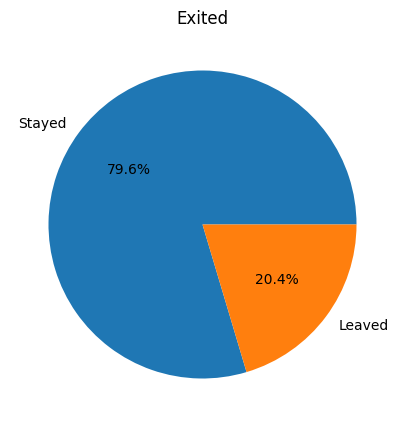

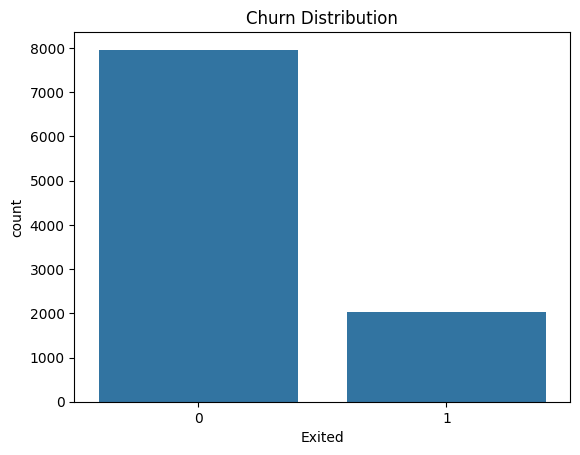

In [ ]:
churn_rate = df['Exited'].value_counts()/len(df)*100
plt.figure(figsize=(10, 5))
plt.pie(churn_rate, labels=['Stayed', 'Leaved'], autopct='%1.1f%%')
plt.title('Exited')
plt.show()

sns.countplot(x='Exited', data=df)
plt.title('Churn Distribution')
plt.show()


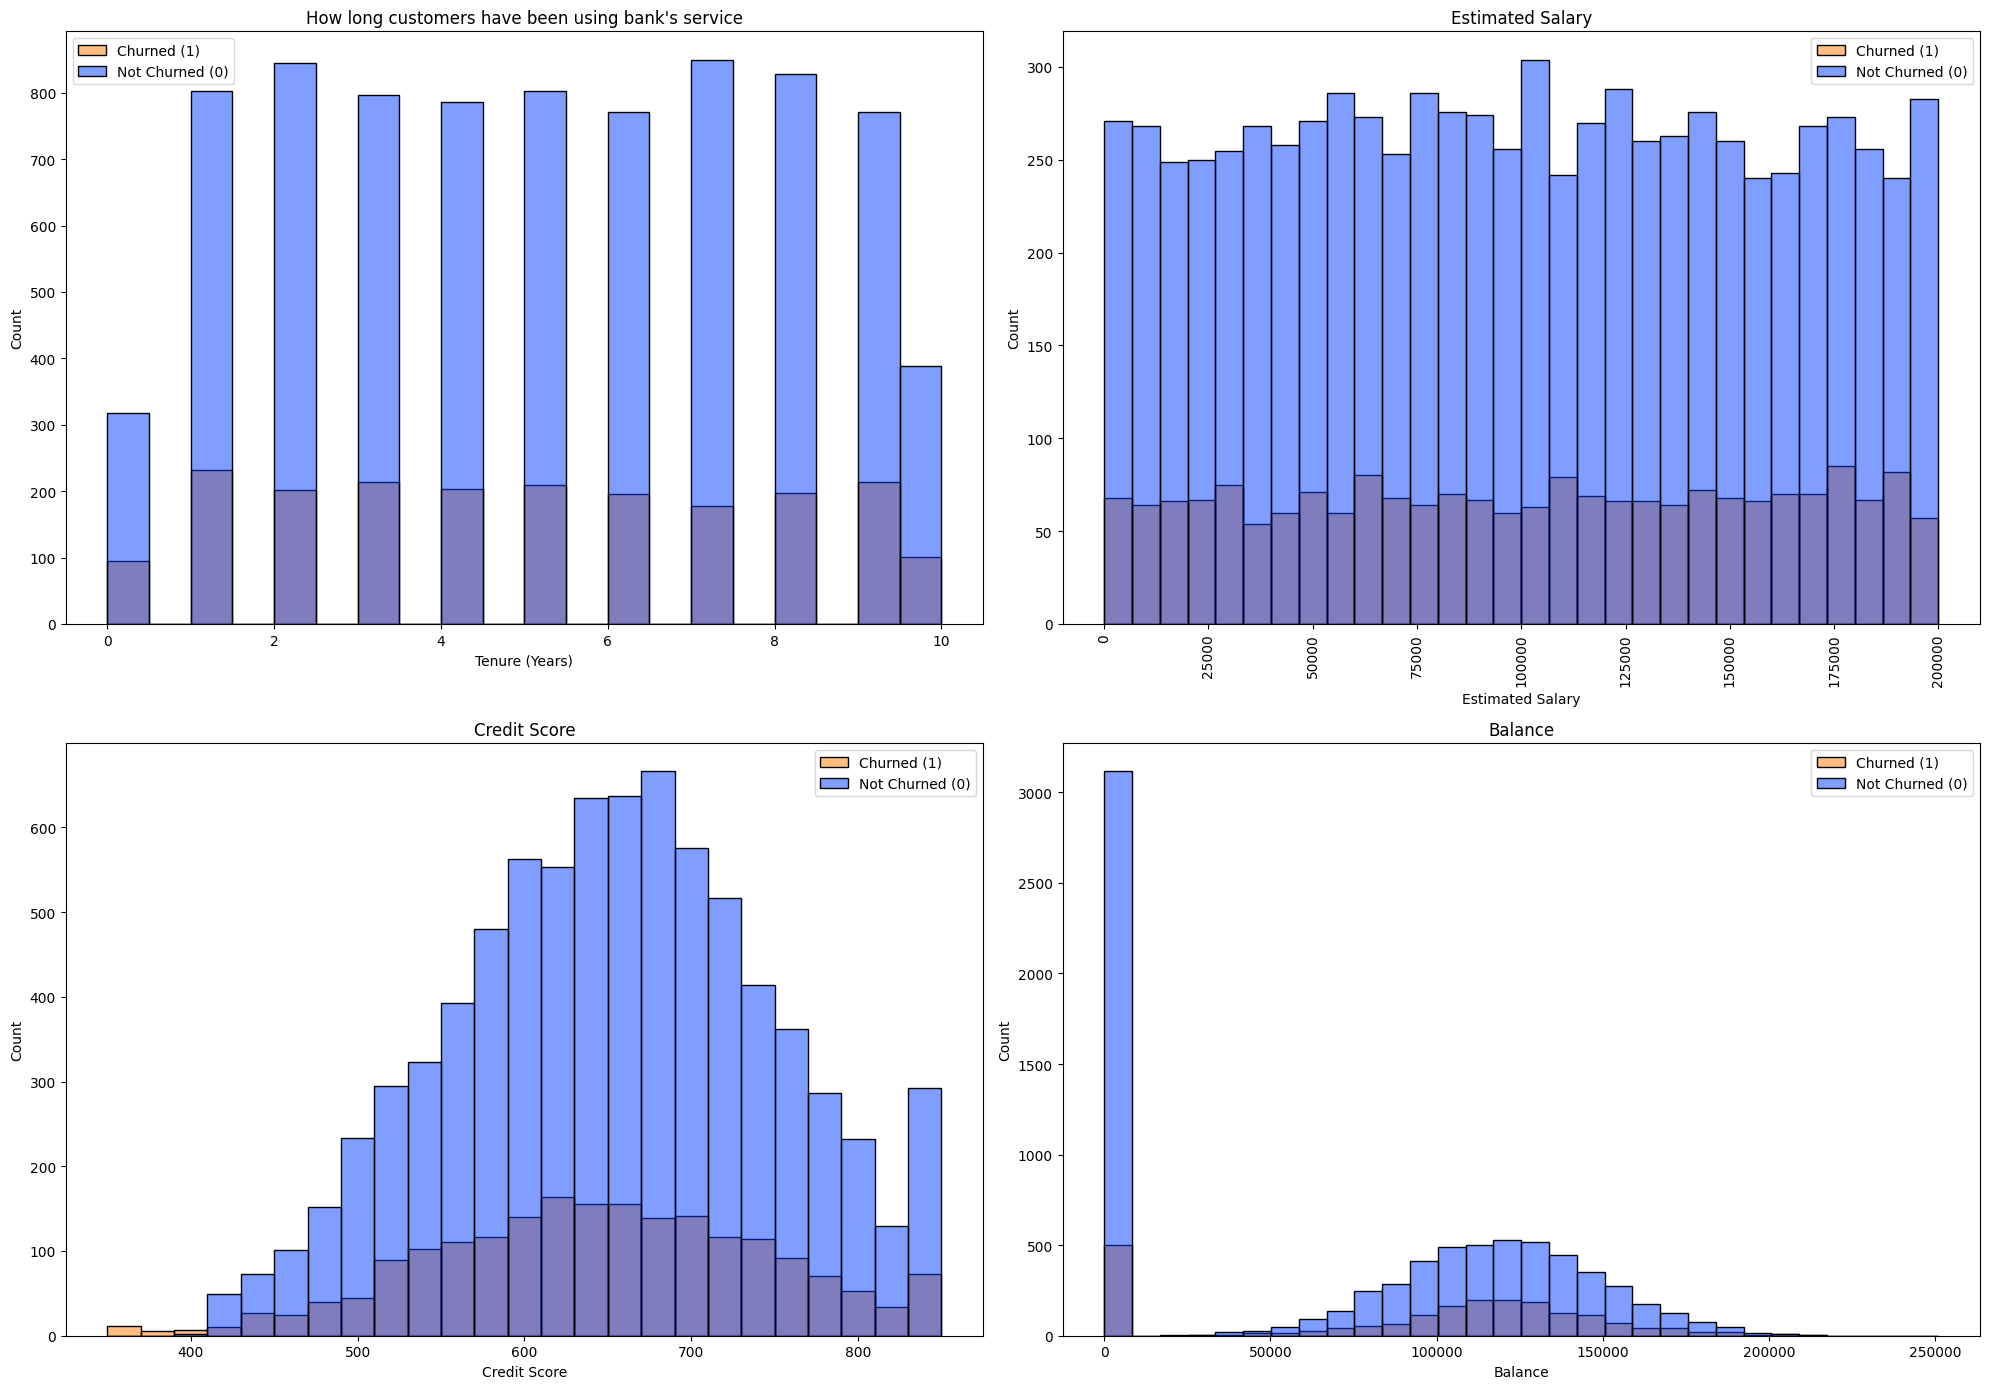

In [ ]:
fig, axes = plt.subplots(2, 2, figsize=(20, 14))

sns.histplot(x="Tenure", data=df, bins=20, hue="Exited", palette='bright', ax=axes[0, 0])
axes[0, 0].set_title("How long customers have been using bank's service")
axes[0, 0].set_xlabel("Tenure (Years)")
axes[0, 0].set_ylabel("Count")
axes[0, 0].legend(labels=["Churned (1)", "Not Churned (0)"])

sns.histplot(x="EstimatedSalary", data=df, bins=30, hue="Exited", palette='bright', ax=axes[0, 1])
axes[0, 1].set_title("Estimated Salary")
axes[0, 1].set_xlabel("Estimated Salary")
axes[0, 1].set_ylabel("Count")
axes[0, 1].tick_params(axis='x', labelrotation=90)
axes[0, 1].legend(labels=["Churned (1)", "Not Churned (0)"])

sns.histplot(x="CreditScore", data=df, bins=25, hue="Exited", palette='bright', ax=axes[1, 0])
axes[1, 0].set_title("Credit Score")
axes[1, 0].set_xlabel("Credit Score")
axes[1, 0].set_ylabel("Count")
axes[1, 0].legend(labels=["Churned (1)", "Not Churned (0)"])


sns.histplot(x="Balance", data=df, bins=30, hue="Exited", palette='bright', ax=axes[1, 1])
axes[1, 1].set_title("Balance")
axes[1, 1].set_xlabel("Balance")
axes[1, 1].set_ylabel("Count")
axes[1, 1].legend(labels=["Churned (1)", "Not Churned (0)"])

plt.tight_layout()
plt.show()


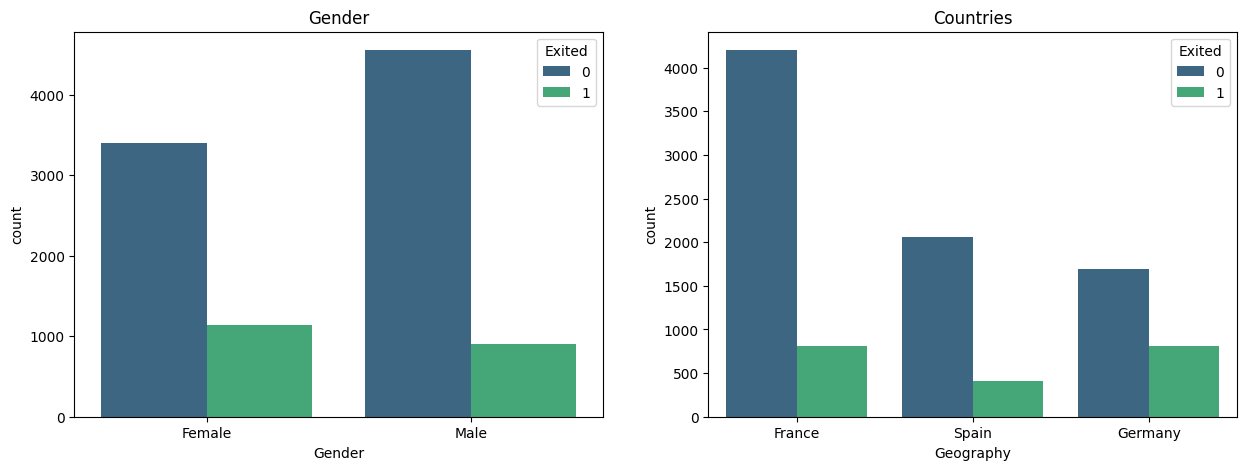

In [ ]:
fig, axes = plt.subplots(1,2, figsize=(15,5))

sns.countplot(x='Gender', hue='Exited', palette='viridis', data=df, ax=axes[0])
axes[0].set_title("Gender")

sns.countplot(x='Geography', hue='Exited', palette='viridis', data=df, ax=axes[1])
axes[1].set_title("Countries")

plt.show()


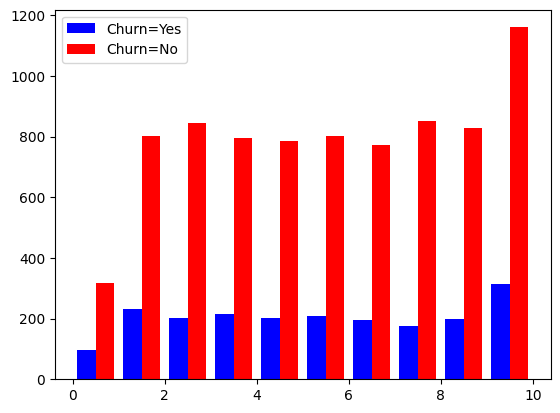

In [ ]:
tenure_churn_no = df[df.Exited==0].Tenure
tenure_churn_yes = df[df.Exited==1].Tenure

plt.hist([tenure_churn_yes, tenure_churn_no], color= ['blue', 'red'], label=['Churn=Yes', 'Churn=No'])
plt.legend()
plt.show()


In [ ]:
df.corrwith(df['Exited'], numeric_only=True).abs().sort_values(ascending=False)

,0
Exited,1.000000
Age,0.285448
IsActiveMember,0.156072
Balance,0.118564
NumOfProducts,0.047621
CreditScore,0.026790
Tenure,0.014208
EstimatedSalary,0.011981
HasCrCard,0.007023


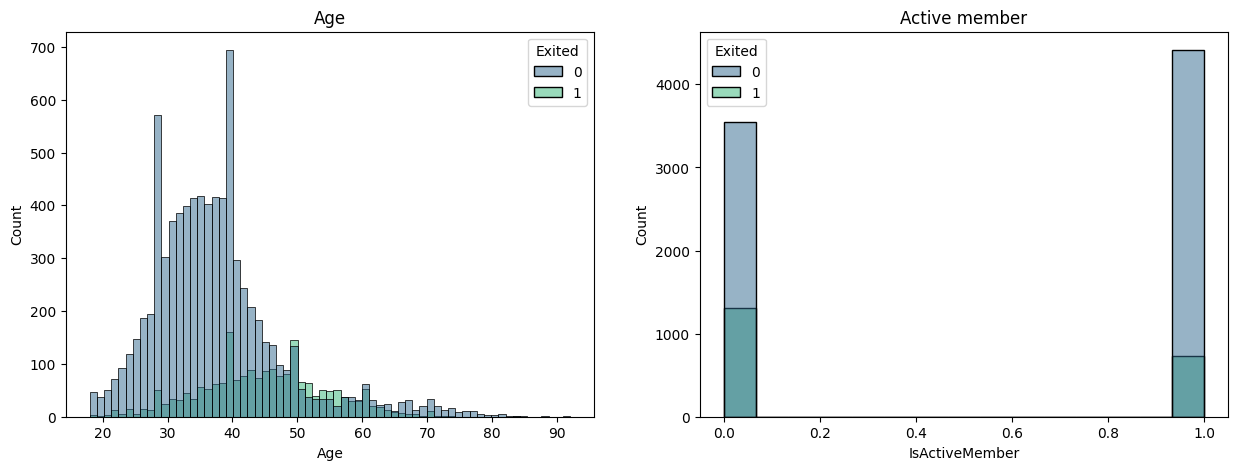

In [ ]:
fig, axes = plt.subplots(1,2, figsize=(15,5))

sns.histplot(x='Age', hue='Exited', palette='viridis', data=df, ax=axes[0])
axes[0].set_title("Age")

sns.histplot(x='IsActiveMember', hue='Exited', palette='viridis', data=df, ax=axes[1])
axes[1].set_title("Active member")

plt.show()

In [ ]:
data = df.copy()
data


,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42.0,2,0.00,1,1.0,1.0,101348.88,1
1,608,Spain,Female,41.0,1,83807.86,1,0.0,1.0,112542.58,0
2,502,France,Female,42.0,8,159660.80,3,1.0,0.0,113931.57,1
3,699,France,Female,39.0,1,0.00,2,0.0,0.0,93826.63,0
5,645,Spain,Male,44.0,8,113755.78,2,1.0,0.0,149756.71,1
...,...,...,...,...,...,...,...,...,...,...,...
9997,709,France,Female,36.0,7,0.00,1,0.0,1.0,42085.58,1
9998,772,Germany,Male,42.0,3,75075.31,2,1.0,0.0,92888.52,1
9999,772,Germany,Male,42.0,3,75075.31,2,1.0,0.0,92888.52,1
10000,792,France,Female,28.0,4,130142.79,1,1.0,0.0,38190.78,0


In [ ]:
data = pd.concat([data,  df2], axis=1)

In [ ]:
data = data.drop(columns=['Geography', 'Gender'], axis=1)
data.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
0,619,42.0,2,0.00,1,1.0,1.0,101348.88,1,1.0,0.0,0.0,1.0,0.0
1,608,41.0,1,83807.86,1,0.0,1.0,112542.58,0,0.0,0.0,1.0,1.0,0.0
2,502,42.0,8,159660.80,3,1.0,0.0,113931.57,1,1.0,0.0,0.0,1.0,0.0
3,699,39.0,1,0.00,2,0.0,0.0,93826.63,0,1.0,0.0,0.0,1.0,0.0
5,645,44.0,8,113755.78,2,1.0,0.0,149756.71,1,0.0,0.0,1.0,0.0,1.0


In [ ]:
class_dist = data['Exited'].value_counts()
print(f"Original class distribution: \n{class_dist}")

Original class distribution: 
Exited
0    7960
1    2038
Name: count, dtype: int64


In [ ]:
maj_class = data[data['Exited'] == 0]
min_class = data[data['Exited'] == 1]

min_oversampled = resample(min_class,
                                replace=True,
                                n_samples=len(maj_class),
                                random_state=42)

data_balanced = pd.concat([maj_class, min_oversampled])

In [ ]:
df_balanced_dist = data_balanced['Exited'].value_counts()
print("\nNew Class Distribution After Oversampling:\n", df_balanced_dist)


New Class Distribution After Oversampling:
 Exited
0    7960
1    7960
Name: count, dtype: int64


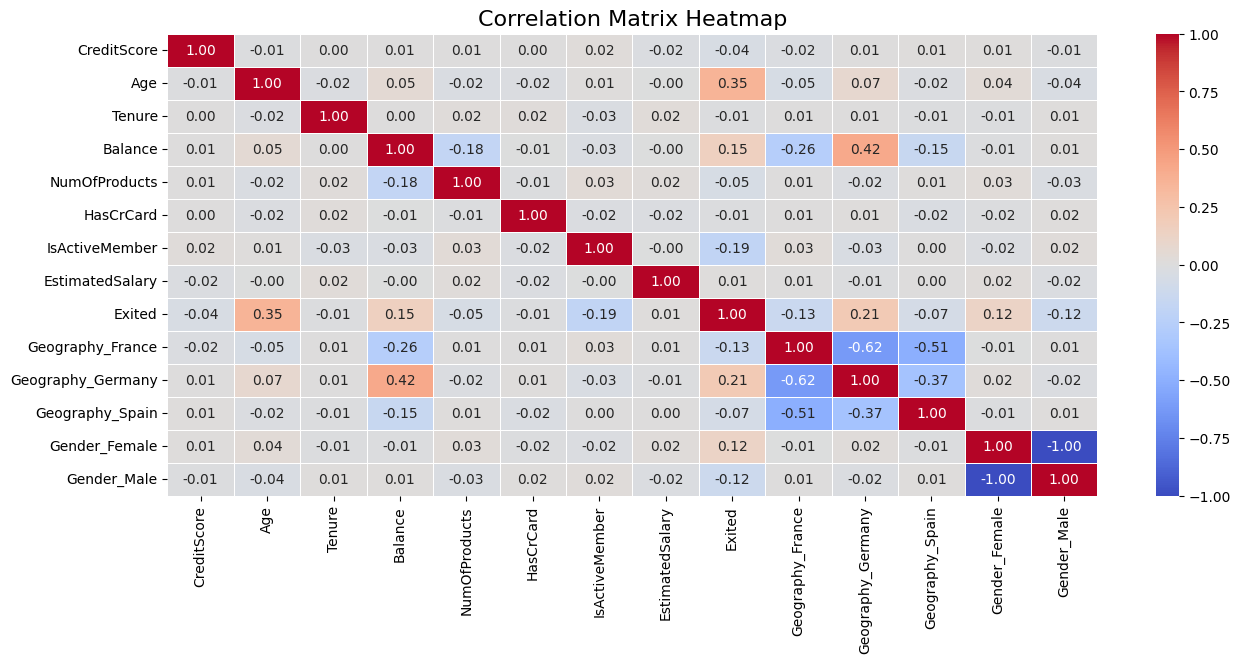

In [ ]:
cor_heatmap = data_balanced.corr()

plt.figure(figsize=(15, 6))
sns.heatmap(cor_heatmap, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix Heatmap', fontsize=16)
plt.show()

In [ ]:
X = data_balanced.drop("Exited", axis=1)
Y = data_balanced['Exited']

In [ ]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2 , random_state=42)

Accuarcy: 0.7038316582914573
              precision    recall  f1-score   support

           0       0.71      0.70      0.71      1603
           1       0.70      0.70      0.70      1581

    accuracy                           0.70      3184
   macro avg       0.70      0.70      0.70      3184
weighted avg       0.70      0.70      0.70      3184



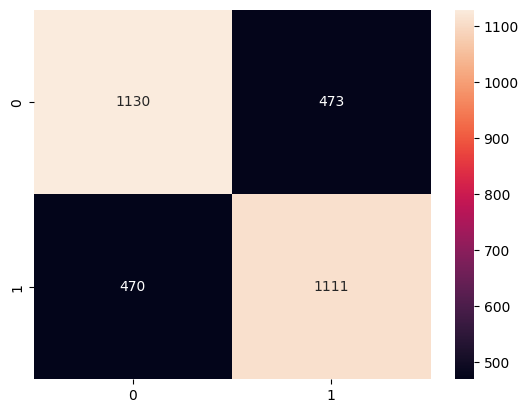

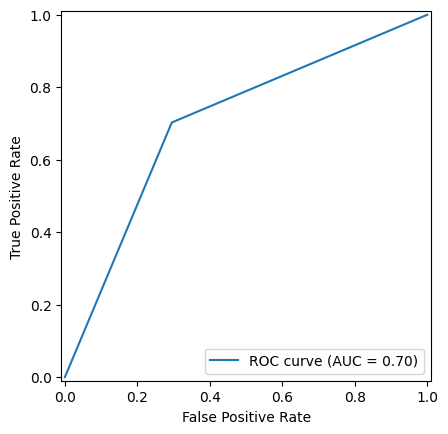

In [ ]:
#1. Logistic regression

# model creation (training)
LR = LogisticRegression(class_weight='balanced')
LR.fit(X_train, Y_train)

# prediction
Y_pred = LR.predict(X_test)

# Checking model accuracy
print(f"Accuarcy: {accuracy_score(Y_test, Y_pred)}")
print(classification_report(Y_test, Y_pred))

## confusion matrix
conf_mat = confusion_matrix(Y_test, Y_pred)
sns.heatmap(conf_mat, annot=True,fmt="g")
plt.show()
## ROC curve
from sklearn import metrics
fpr, tpr, thresholds = metrics.roc_curve(Y_test, Y_pred)
roc_auc = metrics.auc(fpr, tpr)
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name='ROC curve')
display.plot()
plt.show()

Model aniqliligi: 0.9152010050251256
              precision    recall  f1-score   support

           0       0.97      0.85      0.91      1603
           1       0.87      0.98      0.92      1581

    accuracy                           0.92      3184
   macro avg       0.92      0.92      0.91      3184
weighted avg       0.92      0.92      0.91      3184



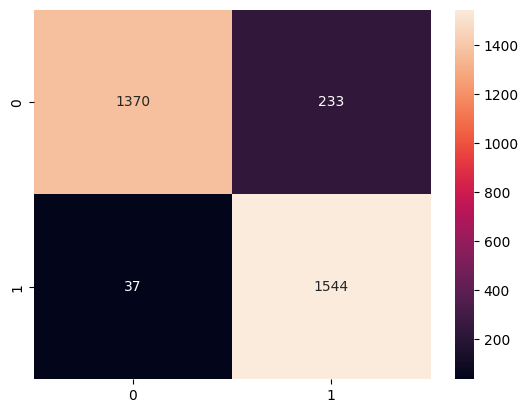

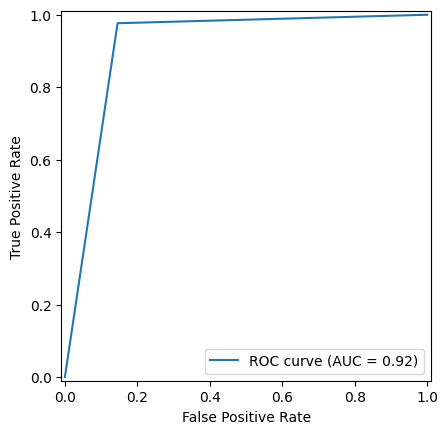

In [ ]:
# 2. Desicion tree

# modelni creation (training)
DT = DecisionTreeClassifier(class_weight='balanced')
DT.fit(X_train, Y_train)

#prediction
Y_pred = DT.predict(X_test)

# checking model accuracy
print(f"Model aniqliligi: {accuracy_score(Y_test, Y_pred)}")

print(classification_report(Y_test, Y_pred))

## confusion matrix
conf_mat = confusion_matrix(Y_test, Y_pred)
sns.heatmap(conf_mat, annot=True,fmt="g")
plt.show()

## ROC curve
from sklearn import metrics
fpr, tpr, thresholds = metrics.roc_curve(Y_test, Y_pred)
roc_auc = metrics.auc(fpr, tpr)
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name='ROC curve')
display.plot()
plt.show()

Model aniqliligi: 0.9494346733668342
              precision    recall  f1-score   support

           0       0.98      0.91      0.95      1603
           1       0.92      0.99      0.95      1581

    accuracy                           0.95      3184
   macro avg       0.95      0.95      0.95      3184
weighted avg       0.95      0.95      0.95      3184



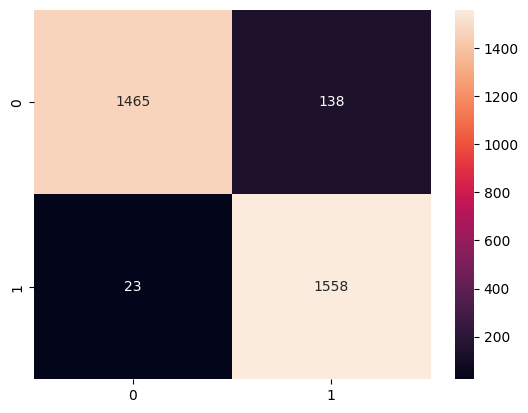

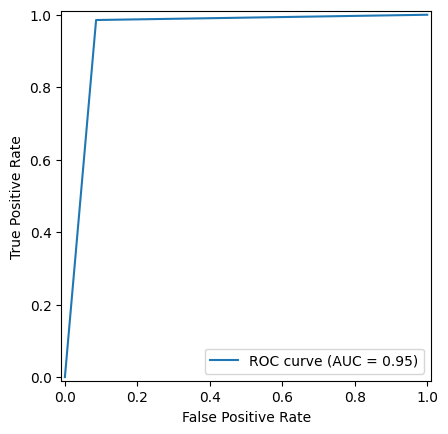

In [ ]:
# 3. Random Forest
# model creation (training)
RF = RandomForestClassifier(class_weight='balanced')
RF.fit(X_train, Y_train)

# prediction
Y_pred = RF.predict(X_test)

# Model Accuracy
print(f"Model aniqliligi: {accuracy_score(Y_test, Y_pred)}")
print(classification_report(Y_test, Y_pred))

## confusion matrix
conf_mat = confusion_matrix(Y_test, Y_pred)
sns.heatmap(conf_mat, annot=True,fmt="g")
plt.show()

## ROC curve
from sklearn import metrics
fpr, tpr, thresholds = metrics.roc_curve(Y_test, Y_pred)
roc_auc = metrics.auc(fpr, tpr)
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name='ROC curve')
display.plot()
plt.show()


Model aniqliligi: 0.8910175879396985
              precision    recall  f1-score   support

           0       0.92      0.86      0.89      1603
           1       0.87      0.92      0.89      1581

    accuracy                           0.89      3184
   macro avg       0.89      0.89      0.89      3184
weighted avg       0.89      0.89      0.89      3184



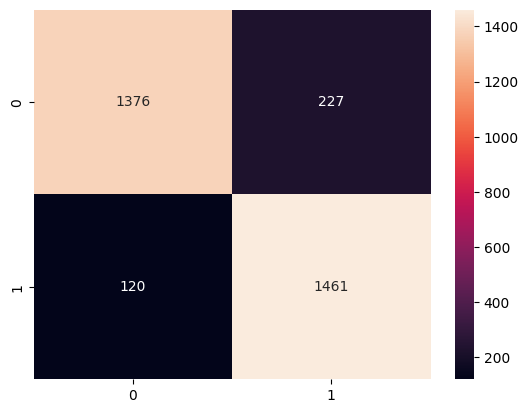

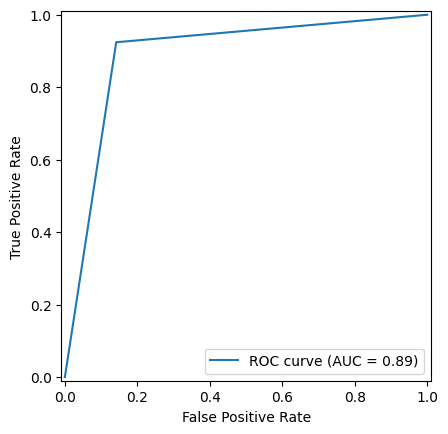

In [ ]:
# 4. XGB Boost
# Model creation  (training)
xgb = XGBClassifier()
xgb.fit(X_train, Y_train)

# Prediction
Y_pred = xgb.predict(X_test)

# model accuracy
print(f"Model aniqliligi: {accuracy_score(Y_test, Y_pred)}")

print(classification_report(Y_test, Y_pred))

## confusion matrix
conf_mat = confusion_matrix(Y_test, Y_pred)
sns.heatmap(conf_mat, annot=True,fmt="g")
plt.show()

## ROC curve
from sklearn import metrics
fpr, tpr, thresholds = metrics.roc_curve(Y_test, Y_pred)
roc_auc = metrics.auc(fpr, tpr)
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name='ROC curve')
display.plot()
plt.show()